In [1]:
import uniplot as up
import pandas as pd
import numpy as np
import uvarprob as uvpr
import matplotlib.pyplot as plt
import solvutil as sut
import time

In [2]:
test_file = "tst1.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
benchmark1,1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275)...,0,1,0,0
benchmark3,(3-x)*(x-1)^2,0,4,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [9]:
import ia_math_fun as iaf
import interval_arithmetics as ia

iaf.set_log_taylor_terms_number(13)
iaf.set_cos_taylor_terms_number(13)
iaf.set_sin_taylor_terms_number(13)
iaf.set_exp_taylor_terms_number(13)
ia.set_precision(10)

for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': []}
    #     print(points_db)

    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, points_db[test.Index]['psl_lipint_points_list']))
    # print(sut.psl(prob, sym = False))
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, points_db[test.Index]['psl_lip_points_list']))
    # print(sut.psl(prob, sym = True))
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['psqe_lipint_points_list']))
    # T1 = time.perf_counter()
    # print(sut.psqe(prob, sym=False,epsilon=1e-8))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-2, global_lipschitz_interval=False,
    #                    estimator=2, reduction=1))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-2, global_lipschitz_interval=False,
    #                    estimator=2, reduction=0))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # 
    # T1 = time.perf_counter()
    # print(sut.psqe(prob, sym=False, epsilon=1e-5, global_lipschitz_interval=True))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-2, global_lipschitz_interval=False,
    #                    estimator=2, reduction=1,adaptive=True))
    # T2 = time.perf_counter()

    # print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=True,
    #                    estimator=2, reduction=2, adaptive=False))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)

    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=True,
    #                    estimator=2, reduction=1, adaptive=False))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['psqe_lipint_points_list']),False,True)
    # T1 = time.perf_counter()
    # print(sut.proc_corr(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=False,
    #                     estimator=2, reduction=0, adaptive=False))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    T1 = time.perf_counter()
    print(sut.proc_corr(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=False,
                        estimator=2, reduction=1, adaptive=False))
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.proc_corr(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=False,
    #                     estimator=2, reduction=2, adaptive=False))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, points_db[test.Index]['psqe_lip_points_list']))
    # print(sut.psqe(prob, sym = True))


benchmark1
3697664556 0
psl:
[a,b]=[ 0 , 1 ], w([a,b])= 1
c*= [0.7356488750, 0.7356488756] w(c*)= 6E-10
psqe:
[a,b]=[ 0 , 1 ], w([a,b])= 1
c*= [0.3678244778, 0.3678244793] w(c*)= 1.5E-9
d*= [0.6321755782, 0.6321755799] w(d*)= 1.7E-9
psl:
[a,b]=[ 0.00003187570642 , 0.5000000262 ], w([a,b])= 0.4999681505
c*= [0.3727701136, 0.3727701148] w(c*)= 1.2E-9
psqe:
[a,b]=[ 0.00003187570642 , 0.5000000262 ], w([a,b])= 0.4999681505
c*= [0.1864016420, 0.1864016432] w(c*)= 1.2E-9
d*= [0.3136314294, 0.3136314308] w(d*)= 1.4E-9
psl:
[a,b]=[ 0.0001386201517 , 0.2500165378 ], w([a,b])= 0.2498779177
c*= [0.2146757029, 0.2146757036] w(c*)= 7E-10
psqe:
[a,b]=[ 0.0001386201517 , 0.2500165378 ], w([a,b])= 0.2498779177
c*= [0.1074054721, 0.1074054725] w(c*)= 4E-10
d*= [0.1427447075, 0.1427447080] w(d*)= 5E-10
psl:
[a,b]=[ 0.0004067253726 , 0.1250747382 ], w([a,b])= 0.1246680129
c*= [0.1033194443, 0.1033194448] w(c*)= 5E-10
psqe:
[a,b]=[ 0.0004067253726 , 0.1250747382 ], w([a,b])= 0.1246680129
c*= [0.0519114783

In [9]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index=2, objective=' x^5 - 8*x^4 + 24*x^3 - 32*x^2 + 16*x ', a=0.1, b=2.1, min_f=0, min_x=0)


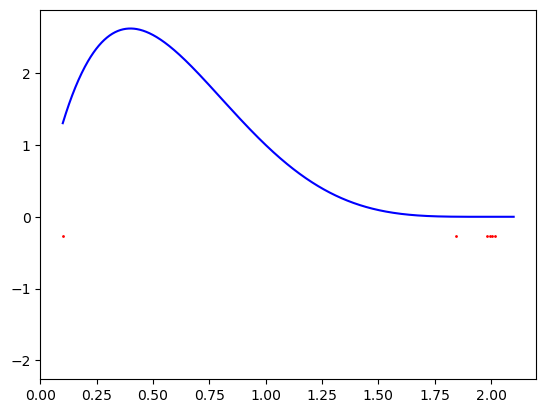

In [19]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['psqe_lipint_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psqe_lip_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psl_lipint_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psl_lip_points_list'], 3, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    plt.show()
